In [95]:
# I am interested in figuring out what factors might impact a pet's chances of getting adopted (vs other outcomes)
# I'm working from a dataset of intakes and outcomes from a shelter in Texas (Austin Animal Center)
# I have previously cleaned this data, so I don't need to worry about duplicates, nulls, etc. 

In [96]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [97]:
# Import data
data = pd.read_csv('Intake and Outcome Data - Austin Animal Center.csv')
data = data.iloc[:,1:]
data['Animal Type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

In [98]:
# Converting strings to numerical values
data['Intake DateTime'] = pd.to_datetime(data['Intake DateTime'], format = '%Y-%m-%d %H:%M:%S')
data['Outcome DateTime'] = pd.to_datetime(data['Outcome DateTime'], format = '%Y-%m-%d %H:%M:%S')
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'], format = '%m/%d/%Y')

In [99]:
# Wildlife Euthanasia Request will never be adopted out, so these won't answer my question in a meaningful way. 
# So I will get rid of all these intake types
# Same for "Disposal" as an outcome type

data = data.loc[(data['Intake Type'] != 'Wildlife') &
                (data['Intake Type'] != 'Euthanasia Request') &
                (data['Outcome Type'] != 'Disposal')]


In [100]:
# Function to calculate the Duration of Stay in days
def calculate_stay(row):
    timedelta = row['Outcome DateTime'] - row['Intake DateTime']
    return timedelta.days

In [101]:
# I'd also like to track the length of stay in the shelter to see if the variables associated with adoption outcome also change how long it takes a pet to be adopted. 

data['Duration of Stay'] = data.apply(calculate_stay, axis = 1)

In [102]:
# I expect that the factors that impact a dog's chances of adoption might differ than those of a cat, livestock, or exotic animal, so I will start by splitting this data by animal type

dogs = data.loc[data['Animal Type'] == 'Dog']
cats = data.loc[data['Animal Type'] == 'Cat']
bird = data.loc[data['Animal Type'] == 'Bird']
livestock = data.loc[data['Animal Type'] == 'Livestock'] #this dataset is pretty small - only about 30 animals, so barely enough data to interpret!
exotics = data.loc[data['Animal Type'] == 'Other']

In [103]:
dogs['Outcome Type'].unique()

array(['Transfer', 'Return to Owner', 'Adoption', 'Rto-Adopt',
       'Euthanasia', 'Died', 'Missing', 'Stolen'], dtype=object)

Text(0.5, 1.0, 'Exotic Outcome Types')

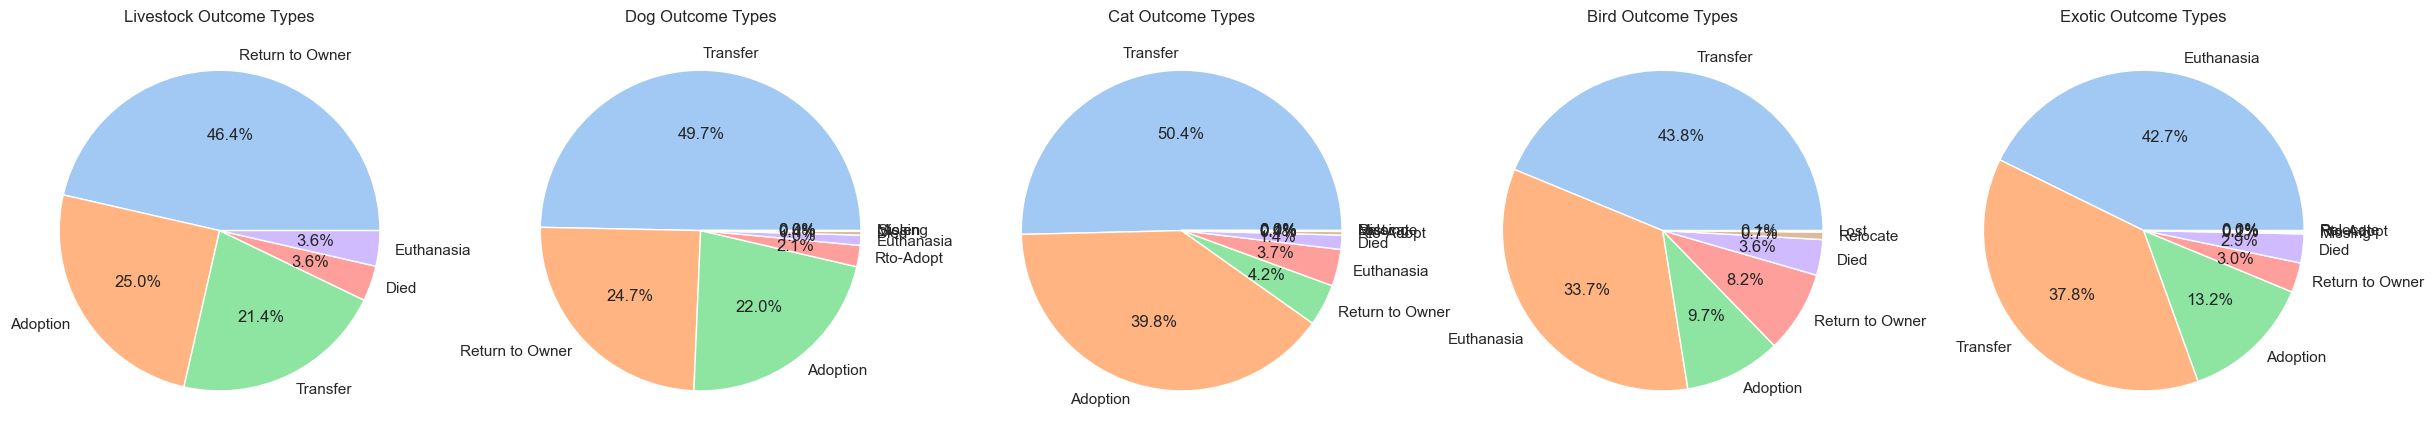

In [104]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))
axs[0].pie(livestock['Outcome Type'].value_counts(normalize=True), colors = sns.color_palette('pastel')[0:10], labels=livestock['Outcome Type'].unique(), autopct='%1.1f%%')
axs[0].set_title('Livestock Outcome Types')

axs[1].pie(dogs['Outcome Type'].value_counts(normalize=True), colors = sns.color_palette('pastel')[0:10], labels=dogs['Outcome Type'].unique(), autopct='%1.1f%%')
axs[1].set_title('Dog Outcome Types')

axs[2].pie(cats['Outcome Type'].value_counts(normalize=True), colors = sns.color_palette('pastel')[0:10], labels=cats['Outcome Type'].unique(), autopct='%1.1f%%')
axs[2].set_title('Cat Outcome Types')

axs[3].pie(bird['Outcome Type'].value_counts(normalize=True), colors = sns.color_palette('pastel')[0:10], labels=bird['Outcome Type'].unique(), autopct='%1.1f%%')
axs[3].set_title('Bird Outcome Types')

axs[4].pie(exotics['Outcome Type'].value_counts(normalize=True), colors = sns.color_palette('pastel')[0:10], labels=exotics['Outcome Type'].unique(), autopct='%1.1f%%')
axs[4].set_title('Exotic Outcome Types')

#sns.displot(livestock['Outcome Type'], kde=True)

 #sharey -> share 'Price' as y
#ax1.scatter(livestock['Year'],livestock['Price'])
#ax1.set_title('Price and Year')
#ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
#ax2.set_title('Price and EngineV')
#ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
#ax3.set_title('Price and Mileage')
#plt.show()


#plt.xlabel('Intake Condition',size=18)
#plt.ylabel('Outcome Type',size=18)

#axs[0].bar(names, values)
#axs[1].scatter(names, values)
#axs[2].plot(names, values)
#fig.suptitle('Categorical Plotting')
#plt.show()


